In [27]:
from gas_hale_sen import GasPoweredHALE
import gpkit
import numpy as np
gpkit.settings['latex_modelname'] = False

# to modify the GasPoweredHALE model, edit gas_hale.py

m = GasPoweredHALE()
m.substitutions.update({"t": 4, "BSFC":0.54, "f_{airframe}":0.3})
sol = m.solve(solver="cvxopt", skipsweepfailures=True)
sol = m.solve()
#m.controlpanel()

Using solver 'cvxopt'
Solving for 20 variables.
Solving took 0.0425 seconds.

Cost
----
 75.3 [lbf] 

Free Variables
--------------
         C_D : 0.04458                Drag coefficient              
         C_L : 1.043                  Lift coefficient              
         C_f : 0.005822               wing skin friction coefficient
  C_{Torque} : 0.1503                 Torque coefficient            
   P_{shaft} : 0.6683     [hp]        Shaft power                   
          Re : 3.317e+05              Reynolds number               
           S : 0.8484     [m**2]      Wing reference area           
     T_{atm} : 258.4      [K]         air temperature               
           V : 31.34      [m/s]       Cruise velocity               
    V_{wind} : 31.34      [m/s]       wind speed                    
           W : 75.3       [lbf]       Aircraft weight               
W_{airframe} : 22.59      [lbf]       Airframe weight               
     W_{eng} : 13         [lbf]       En

In [1]:
x = sol('W_{fuel}')/sol('W')
y = sol('W_{pay}')/sol('W')
z = sol('P_{shaft}')/745.699872
print x
print y
print z

NameError: name 'sol' is not defined

In [40]:
import numpy as np
m.substitutions.update({"t": ('sweep', np.linspace(4, 6, 5)),
                        "W_{pay}": ('sweep', np.linspace(4,15,10))})
sol = m.solve(solver="mosek", verbosity=0, skipsweepfailures=True)

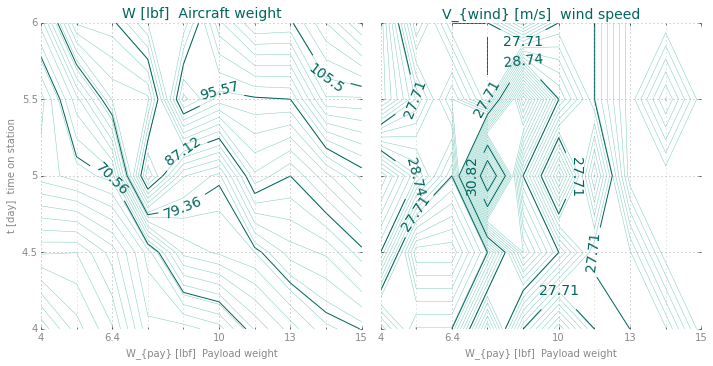

In [41]:
%matplotlib inline
from gpkit.interactive.plotting import contour_array
_ = contour_array(m, "W_{pay}", "t", ["W", "V_{wind}"])